In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
speclib_filepath = "../Output/D_002_SpecLib_Derivs.csv"

input_df = pd.read_csv(speclib_filepath)
input_df.head()

,ScanID,Code_name,Species_name,Functional_group1,Functional_group2,Area,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Boochs,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
0,aleoch_Murph_061,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,Murphy,6,97,460,0.001818,...,0.253714,0.254478,0.255176,0.255714,0.256204,0.256744,0.257286,0.257767,0.258160,0.258481
1,aleoch_Murph_063,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,Murphy,6,97,460,0.001779,...,0.201025,0.201714,0.202366,0.202943,0.203526,0.204171,0.204810,0.205368,0.205809,0.206160
2,aleoch_Murph_064,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,Murphy,6,97,460,0.002775,...,0.317765,0.318003,0.318183,0.318076,0.317934,0.317952,0.317931,0.317696,0.317323,0.316932
3,aleoch_Murph_065,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,Murphy,6,97,460,0.003004,...,0.337911,0.338070,0.338184,0.338127,0.338018,0.337977,0.338016,0.338104,0.338143,0.338103
4,aleoch_Murph_066,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,Murphy,6,97,460,0.002610,...,0.288182,0.288323,0.288394,0.288381,0.288399,0.288523,0.288659,0.288687,0.288507,0.288137


In [3]:
input_df.describe()



,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Boochs,Boochs2,CARI,Carter,Carter2,Carter3,Carter4,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,...,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,60.085981,206.347664,399.567290,0.007579,0.006569,0.593614,2.347969,0.394174,0.339885,0.627527,...,0.472522,0.473125,0.473689,0.474219,0.474760,0.475339,0.475915,0.476451,0.476964,0.477464
std,136.206098,341.218283,318.919171,0.004174,0.004622,0.347223,1.252466,0.267837,0.249235,0.199230,...,0.166962,0.166865,0.166754,0.166630,0.166487,0.166325,0.166157,0.165998,0.165847,0.165699
min,2.000000,2.000000,29.000000,0.000045,-0.000485,0.062027,0.946166,0.076189,0.057444,0.285020,...,0.056940,0.057816,0.058709,0.059630,0.060547,0.061441,0.062360,0.063342,0.064347,0.065349
25%,10.000000,32.000000,100.000000,0.003863,0.001791,0.381864,1.493619,0.161856,0.139225,0.449353,...,0.368488,0.369635,0.370728,0.371845,0.374887,0.375636,0.378387,0.379758,0.380856,0.381954
50%,17.000000,56.000000,252.000000,0.008447,0.007032,0.514919,1.873978,0.255806,0.221447,0.561695,...,0.480951,0.481020,0.481216,0.481239,0.481641,0.481535,0.481201,0.481750,0.481830,0.481760
75%,43.000000,111.000000,460.000000,0.010667,0.010494,0.714629,2.765156,0.640842,0.522099,0.822563,...,0.577136,0.579304,0.579554,0.580536,0.581557,0.582075,0.582048,0.582519,0.584153,0.584494
max,611.000000,967.000000,991.000000,0.023572,0.017879,3.123549,8.402378,1.005836,1.038892,1.011443,...,0.960912,0.959606,0.958230,0.956370,0.954455,0.952877,0.951512,0.950267,0.949391,0.948973


In [31]:
training_df, test_df = train_test_split(input_df, test_size=0.15)

In [11]:
def is_numeric(input_obj):
    is_number = False
    if(isinstance(input_obj, float)):
        is_number = True
    if(isinstance(input_obj, int)):
        is_number = True
    
    return is_number
        

In [16]:
def add_noise_to_vec(vec, variance = 0.05):
    noisy_vec = copy.deepcopy(vec).flatten()
    
    for idx in range(vec.size):
        if is_numeric(noisy_vec[idx]):
            noisy_vec[idx] = noisy_vec[idx] + np.random.normal(loc=0.0, scale= variance)

    return noisy_vec

## Ask for noise file from Charlie at Headwall


In [5]:
unique_groups = input_df["Functional_group2"].unique()
print(unique_groups)

['Lichen' 'Shrub' 'Graminoid' 'Dwarf Shrub' 'Moss' 'Abiotic' 'Tree' 'Forb']


In [9]:
output_filename = "./trainingData.csv"

In [ ]:
header = input_df.columns

In [18]:
def write_csv_line(file, arr):
    output_arr = arr.reshape((arr.size,))
    for idx in range(arr.size):
        if(idx == (arr.size - 1)):
            file.write(str(output_arr[idx]))
            file.write("\n")
        else:        
            file.write(str(output_arr[idx]))
            file.write(",")

In [27]:
def make_dataset_from_speclib(input_df, output_filename, unique_groups, num_per_class):
    with open(output_filename, "a+") as out_file:
        header_str = ",".join(input_df.columns)
        out_file.writelines([header_str])
        out_file.write("\n")
        for group in unique_groups:
            filtered_df = input_df[input_df["Functional_group2"] == group]
            for i in range(num_per_class):
                sample = filtered_df.sample(1, axis=0).to_numpy()
                noisy_sample = add_noise_to_vec(sample)
                write_csv_line(out_file, noisy_sample)


            
            
            
            

In [61]:
make_dataset_from_speclib(
    input_df = training_df,
    output_filename=output_filename,
    unique_groups=unique_groups,
    num_per_class=500)

In [60]:
test_data_filename = "./validation.csv"

make_dataset_from_speclib(
    input_df=input_df,
    output_filename=test_data_filename,
    unique_groups=unique_groups,
    num_per_class=100
)


In [24]:
training_data = pd.read_csv(output_filename)

In [25]:
training_data.describe()


,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Boochs,Boochs2,CARI,Carter,Carter2,Carter3,Carter4,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.711019,142.775263,255.001294,0.007834,0.007353,0.558711,2.343916,0.387733,0.338802,0.617181,...,0.459040,0.457202,0.458957,0.461705,0.461414,0.461865,0.462210,0.460737,0.464458,0.462185
std,108.356249,291.951782,308.845587,0.050247,0.050741,0.303589,1.308030,0.290527,0.274345,0.212139,...,0.163124,0.163005,0.164712,0.163878,0.163110,0.161182,0.163247,0.161841,0.163524,0.162475
min,1.933747,1.975508,28.870883,-0.204380,-0.189977,-0.051214,0.888452,-0.029703,-0.060638,0.129363,...,-0.023950,-0.076657,-0.049284,-0.014452,-0.044748,-0.010296,-0.009357,-0.010087,-0.059288,-0.060454
25%,7.979403,17.041369,59.397666,-0.026059,-0.027159,0.365978,1.436126,0.162608,0.142360,0.444796,...,0.359099,0.353880,0.353305,0.358484,0.356374,0.360411,0.361712,0.356002,0.360398,0.362753
50%,13.023032,35.939283,95.017486,0.007119,0.006756,0.490765,1.823718,0.260457,0.229529,0.555096,...,0.469295,0.467010,0.469096,0.468521,0.467661,0.470137,0.472978,0.470376,0.474649,0.469887
75%,20.045276,79.994085,304.102520,0.040751,0.041393,0.666417,2.800551,0.619198,0.464254,0.801848,...,0.562298,0.559584,0.562769,0.567258,0.565570,0.563711,0.564377,0.564276,0.567814,0.563846
max,611.102636,967.144021,991.144156,0.179914,0.222947,2.961519,8.452715,1.143011,1.144257,1.165742,...,1.025979,1.003641,0.988504,1.074409,1.032489,0.997044,1.033283,0.946639,0.993616,0.961048


In [32]:
rf_base = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=2,
    bootstrap=True,
    verbose=1,
)# trained on original data

rf_augmented = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=2,
    bootstrap=True,
    verbose=1,
) # new data

In [34]:
training_df.columns

Index(['ScanID', 'Code_name', 'Species_name', 'Functional_group1',
       'Functional_group2', 'Area', 'Species_name_Freq',
       'Functional_group1_Freq', 'Functional_group2_Freq', 'Boochs',
       ...
       '852.593_5nm', '857.593_5nm', '862.593_5nm', '867.593_5nm',
       '872.593_5nm', '877.593_5nm', '882.593_5nm', '887.593_5nm',
       '892.593_5nm', '897.593_5nm'],
      dtype='object', length=205)

In [35]:
rf_base.fit(
    training_df.drop(
        columns=[
            "ScanID",
            "Code_name",
            "Species_name", 
            "Functional_group1", 
            "Functional_group2",
            "Area",
            'Functional_group1_Freq',
            'Functional_group2_Freq' ]), 
    training_df["Functional_group2"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.6s finished


RandomForestClassifier(n_estimators=1000, verbose=1)

In [38]:
dropped_cols = [
            "ScanID",
            "Code_name",
            "Species_name", 
            "Functional_group1", 
            "Functional_group2",
            "Area",
            'Functional_group1_Freq',
            'Functional_group2_Freq' ]

In [36]:
rf_augmented.fit(
    training_data.drop(
        columns=[
            "ScanID",
            "Code_name",
            
            "Species_name", 
            "Functional_group1", 
            "Functional_group2",
            "Area",
            'Functional_group1_Freq',
            'Functional_group2_Freq' ]), 
    training_data["Functional_group2"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   38.2s finished


RandomForestClassifier(n_estimators=1000, verbose=1)

In [39]:
base_test_pred = rf_base.predict(test_df.drop(columns=dropped_cols))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [42]:
base_accuracy = accuracy_score(test_df["Functional_group2"], base_test_pred)
base_f1 = f1_score(test_df["Functional_group2"], base_test_pred, average = 'weighted')

In [44]:
augmented_test_pred = rf_augmented.predict(test_df.drop(columns=dropped_cols))
augmented_accuracy = accuracy_score(test_df["Functional_group2"], augmented_test_pred)
augmented_f1 = f1_score(test_df["Functional_group2"], augmented_test_pred, average = 'weighted')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [47]:
print("--- Test results comparison ---")
print("Base Model (Class Imbalance):")
print(f"Accuracy: \t{base_accuracy}")
print(f"F1 Score: \t{base_f1}")
print("Augmented Model (Added noise, No Class Imbalance):")
print(f"Accuracy: \t{augmented_accuracy}")
print(f"F1 Score: \t{augmented_f1}")

--- Test results comparison ---
Base Model (Class Imbalance):
Accuracy: 	0.906832298136646
F1 Score: 	0.9052834467120181
Augmented Model (Added noise, No Class Imbalance):
Accuracy: 	0.9316770186335404
F1 Score: 	0.934919697849447


In [ ]:
print("--- Test results comparison ---")
print("Base Model (Class Imbalance):")
print(f"Accuracy: \t{base_accuracy}")
print(f"F1 Score: \t{base_f1}")
print("Augmented Model (Added noise, No Class Imbalance):")
print(f"Accuracy: \t{augmented_accuracy}")
print(f"F1 Score: \t{augmented_f1}")

--- Test results comparison ---
Base Model (Class Imbalance):
Accuracy: 	0.906832298136646
F1 Score: 	0.9052834467120181
Augmented Model (Added noise, No Class Imbalance):
Accuracy: 	0.9316770186335404
F1 Score: 	0.934919697849447


## To Do
Smoothing of target data
Heterogenious 
Normalization or standardization
Optimization of number of classes; should be homogeneous

Rigorous statistical analysis to establish clusters
* Euclidean distance in spectral is problematic; must be on the same scale: Normalization to [0,1]? z-scores?
* Clustering
* More scan data is good
* Difference between spectra on ground and drone (DEMs to correct reflectance)
* Partial Least Squares Descriminant Analysis: non-orthogonal PCA; finds axes of variation (like factor analysis for classification)
* consider wide range of options

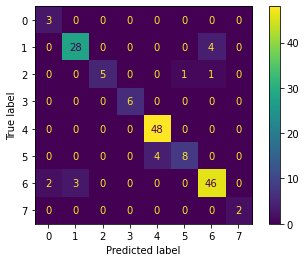

In [58]:
base_confusion = confusion_matrix(test_df["Functional_group2"], base_test_pred)
base_cm = ConfusionMatrixDisplay(base_confusion)

base_cm.plot()
plt.show()

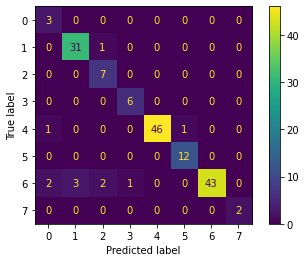

In [59]:
augmented_confusion = confusion_matrix(test_df["Functional_group2"], augmented_test_pred)
augmented_cm = ConfusionMatrixDisplay(augmented_confusion)

augmented_cm.plot()
plt.show()

In [63]:
base_filename = "./base_rf_1.pkl"
augmented_filename = "./class_corrected_noised_rf_1.pkl"

with open(base_filename, 'wb') as base_file:
    pickle.dump(rf_base, base_file)
    
with open(augmented_filename, 'wb') as aug_file:
    pickle.dump(rf_augmented, aug_file)

## Learnings

Trees perhaps should be split

water status makes a big difference, same with phenotype variation
Photograph on the ground, find exact spot on ground and 


## File transfers
cyberduck
fileZilla

use MD5 sums